In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import random
import seaborn as sns
import sklearn.metrics as sk
import time

from collections import Counter

In [2]:
def pre_processing():
    df = pd.read_csv('dataset_20210113.csv')
    query = df.query('resultadoFinalExame == "Positivo"').groupby('faixaEtaria')['faixaEtaria'].count()
    sort = query.sort_values(ascending=True)
    dataset = pd.DataFrame(sort)
    dataset.rename(columns={'Age': 'count'}, inplace=True)
    return dataset

In [3]:
#########################################################
def pre_processing():
    df = pd.read_csv('dataset_20210113.csv')
    query = df.query('resultadoFinalExame == "Positivo"').groupby('idadeCaso')['idadeCaso'].count()
    sort = query.sort_values(ascending=True)
    dataset = pd.DataFrame(sort)
    dataset.rename(columns={'Age': 'count'}, inplace=True)
    return dataset

In [4]:
dataset = pre_processing()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (2,5,6,7,8,9,14,15,20,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
dataset = pd.DataFrame({'Age': dataset.index.to_list(), 'count': dataset.values.flatten().tolist()})
ages_counts = []
eighty_more = 0
for i in range(len(dataset)):
    #print(dataset.loc[i][0])
    if(dataset.loc[i][0] >= 80.0):
        eighty_more += 1
    else:
        ages_counts.append([str(dataset.loc[i][0]), dataset.loc[i][1]])
ages_counts.append(['80 or more', eighty_more])
dataset = pd.DataFrame(ages_counts)
dataset = dataset.rename(columns={0: 'Age', 1: 'count'})
dataset = dataset.sort_values('count')
dataset.index = np.arange(len(dataset))

In [6]:
dataset

,Age,count
0,80 or more,57.0
1,6.0,897.0
2,4.0,925.0
3,7.0,936.0
4,3.0,945.0
5,5.0,975.0
6,8.0,991.0
7,9.0,1014.0
8,11.0,1088.0
9,10.0,1111.0


# Reverse Top-k Query

In [7]:
def reverse_top_k(dataset, k):
    return dataset[:k]

In [8]:
reverse_top_k(dataset, 10)

,Age,count
0,80 or more,57.0
1,6.0,897.0
2,4.0,925.0
3,7.0,936.0
4,3.0,945.0
5,5.0,975.0
6,8.0,991.0
7,9.0,1014.0
8,11.0,1088.0
9,10.0,1111.0


# Auxiliary Functions

In [9]:
def sensitivity(dataset):
    return 1

In [10]:
def score_function(dataset):
    return -dataset['count']

In [11]:
def plot_errors(errors, k, mechanism):
    df = pd.DataFrame({
        'epsilon': ['0.01', '0.1', '0.5', '1', '1.5', '2'],
        'Error': [errors[0.01], errors[0.1], errors[0.5], errors[1], errors[1.5], errors[2]]})
    
    sns.catplot(x="epsilon", y="Error", palette="ch:start=.2,rot=-.3",
            data=df, saturation=.7,
            kind="bar", ci=None, aspect=.9, order=['0.01','0.1', '0.5', '1', '1.5', '2'])
    plt.xlabel("Budget(ε)")
    plt.ylabel("Error, k = {}".format(k))
    plt.savefig('ages_{}.png'.format(mechanism), format='png', dpi=320)
    plt.title("Average using the Our Error metric for {}".format(mechanism))
    return plt.show()

# Laplace Mechanism applied into the age_classes

In [12]:
def laplace(budget, sensitivity, dataset):
    k=10
    counts = dataset['count']
    ages_col = dataset['Age']
    local_budget = budget/k
    scale = sensitivity/local_budget
    noise = stats.laplace.rvs(loc = 0, scale = scale, size=dataset.shape[0])
    data = dataset.copy()
    data['count'] += noise
    
    return data.sort_values(by='count', ascending=True)

In [13]:
laplace(0.1, sensitivity(dataset), dataset)

,Age,count
0,80 or more,178.285643
1,6.0,712.110106
4,3.0,773.268623
3,7.0,829.926085
11,12.0,892.347710
6,8.0,1000.360207
7,9.0,1035.130516
5,5.0,1041.783561
8,11.0,1080.265614
10,2.0,1103.269547


In [14]:
def error_laplace(original, budgets, dataset):
    error_rate = {}
    for budget in budgets:
        disturbed = laplace(budget, sensitivity(dataset), dataset)[:k]
        disturbed.index = np.arange(0, len(disturbed))
        #print(budget)
        wrong_position = 0
        for i in range(k):
            if(original['Age'][i] != disturbed['Age'][i]):
                wrong_position+=1
        error_rate[budget] = wrong_position/k
    return error_rate

In [15]:
budgets = [0.01, 0.1, 0.5, 1, 1.5, 2]
#budgets = [0.1, 1, 5, 10, 30, 75]
k = 10
groundtruth = reverse_top_k(dataset, k)
groundtruth['Age'][0]
initial_time_laplace = time.time()
errors = error_laplace(groundtruth, budgets, dataset)
final_time_laplace = time.time()
errors

{0.01: 0.9, 0.1: 0.7, 0.5: 0.7, 1: 0.0, 1.5: 0.2, 2: 0.0}

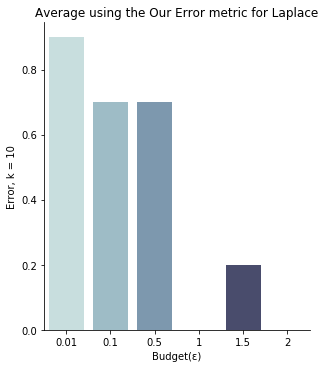

Runtime Laplace:  0.019947528839111328


In [16]:
plot_errors(errors, 10, 'Laplace')
print("Runtime Laplace: ", final_time_laplace-initial_time_laplace)

# Exponential Mechanism applied into the age_classes

In [17]:
def exponential_ages(budget, sensitivity, dataset, k):
    budget = budget/k

    scores = score_function(dataset)

    _ages = list(dataset['Age'].copy())
    _scores = list(scores.copy())
    
    counts = list(dataset['count'].copy())

    top = []

    for i_run in range(k):

        probabilities = []

        for j_score in _scores:
            probability = math.exp((budget * j_score) / (2 * sensitivity))
            probabilities.append(probability)

        probabilities = [j_probability/sum(probabilities) if(sum(probabilities)!=0) else 1 for j_probability in probabilities]

        sample = random.choices(population=_ages, weights=probabilities, k=1)[0]
        
        count = counts[_ages.index(sample)]

        top.append([sample, count])

        _scores.remove(_scores[_ages.index(sample)])
        _ages.remove(sample)
        counts.remove(count)

    return pd.DataFrame(top, columns = ['Age', 'count'])

In [18]:
def error_exponential(original, budgets, dataset):
    error_rate = {}
    for budget in budgets:
        disturbed = exponential_ages(budget, sensitivity(dataset), dataset, k)
        #print(budget)
        wrong_position = 0
        for i in range(len(original)):
            if(original['Age'][i] != disturbed['Age'][i]):
                wrong_position+=1
        error_rate[budget] = wrong_position/k
    return error_rate

In [19]:
initial_time_exponential = time.time()
errors = error_exponential(groundtruth, budgets, dataset)
final_time_exponential = time.time()
errors

{0.01: 1.0, 0.1: 0.7, 0.5: 0.5, 1: 0.3, 1.5: 0.0, 2: 0.2}

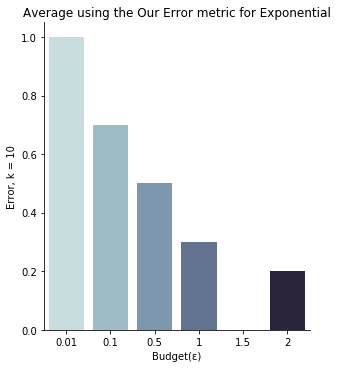

Runtime Exponential:  0.02194380760192871


In [20]:
plot_errors(errors, 10, 'Exponential')
print("Runtime Exponential: ", final_time_exponential-initial_time_exponential)

# Permute and Flip Mechanism applied into the age_classes

In [21]:
def permute_age_groups(budget, sensitivity, dataset, k):
    d = dataset.copy()
    d = d.sample(len(dataset))
    
    d.index = np.arange(len(d))
    budget = budget/k
    top = [] 
    probabilities = []

    counts = list(d['count'])

    for i_run in range(k):    
        max_score = max(score_function(d))
        scores = score_function(d)
        _scores = list(scores)

        for j_score in _scores:
            probability = math.exp((budget * (j_score - max_score)) / (2 * sensitivity))

            #bernoulli condition
            if(stats.bernoulli(probability).rvs()):
                index = np.array(d.loc[d['count'] == -j_score].index)[0]

        top.append(d.loc[index])

        _scores.remove(_scores[index])
        d = d.drop(index)
        d.index = np.arange(len(d))
    return pd.DataFrame(top, columns = ['Age', 'count'], index=np.arange(k))

In [22]:
def error_permute(original, budgets, dataset):
    error_rate = {}
    for budget in budgets:
        disturbed = permute_age_groups(budget, sensitivity(dataset), dataset, k)
        #print(budget)
        wrong_position = 0
        for i in range(len(original)):
            if(original['Age'][i] != disturbed['Age'][i]):
                wrong_position+=1
        error_rate[budget] = wrong_position/k
    return error_rate

In [23]:
errors = error_permute(groundtruth, budgets, dataset)
errors

{0.01: 1.0, 0.1: 0.8, 0.5: 0.6, 1: 0.6, 1.5: 0.4, 2: 0.3}

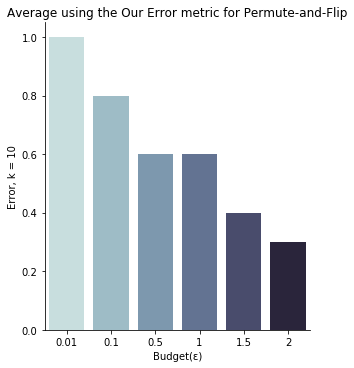

In [24]:
plot_errors(errors, 10, 'Permute-and-Flip')
#print("Runtime Permute-and-Flip: ", final_time_pf-initial_time_pf)

# Calculating the average of the values for each epsilon

### Laplace

In [25]:
#calculating the average of our metric executing our approach 20 times (for each epsilon value)
aux_lap = []
groundtruth = reverse_top_k(dataset, k)
for _ in range(20):
    errors = error_laplace(groundtruth, budgets, dataset)
    aux_lap.append(errors)
list_of_dicts = []
avgs = {}
for budget in budgets:
    list_ = []
    for j in range(len(aux_lap)):
        list_.append(aux_lap[j][budget])
    list_of_dicts.append(list_)
for i in range(len(budgets)):
    avgs[budgets[i]] = np.mean(list_of_dicts[i])
avgs

{0.01: 0.945,
 0.1: 0.74,
 0.5: 0.4849999999999999,
 1: 0.25,
 1.5: 0.20500000000000002,
 2: 0.07999999999999999}

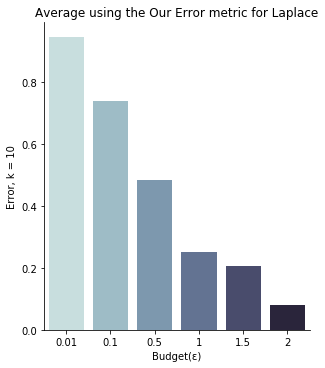

In [26]:
mechanism = 'Laplace'
plot_errors(avgs, 10, mechanism)

### Exponencial

In [27]:
#calculating the average of our metric executing our approach 20 times (for each epsilon value)
aux_exp = []
groundtruth = reverse_top_k(dataset, k)
for _ in range(20):
    errors = error_exponential(groundtruth, budgets, dataset)
    aux_exp.append(errors)
list_of_dicts = []
avgs = {}
for budget in budgets:
    list_ = []
    for j in range(len(aux_exp)):
        list_.append(aux_exp[j][budget])
    list_of_dicts.append(list_)
for i in range(len(budgets)):
    avgs[budgets[i]] = np.mean(list_of_dicts[i])
avgs

{0.01: 0.945,
 0.1: 0.805,
 0.5: 0.59,
 1: 0.4050000000000001,
 1.5: 0.30500000000000005,
 2: 0.20500000000000002}

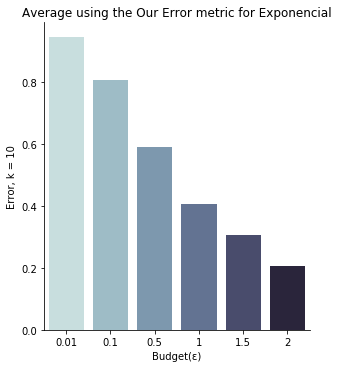

In [28]:
mechanism = 'Exponencial'
plot_errors(avgs, 10, mechanism)

### Permute and Flip

In [29]:
#calculating the average of our metric executing our approach 20 times (for each epsilon value)
aux_pf = []
groundtruth = reverse_top_k(dataset, k)
for _ in range(20):
    errors = error_permute(groundtruth, budgets, dataset)
    aux_pf.append(errors)
list_of_dicts = []
avgs = {}
for budget in budgets:
    list_ = []
    for j in range(len(aux_pf)):
        list_.append(aux_pf[j][budget])
    list_of_dicts.append(list_)
for i in range(len(budgets)):
    avgs[budgets[i]] = np.mean(list_of_dicts[i])
avgs

{0.01: 0.9749999999999999,
 0.1: 0.8350000000000002,
 0.5: 0.57,
 1: 0.34,
 1.5: 0.225,
 2: 0.17500000000000002}

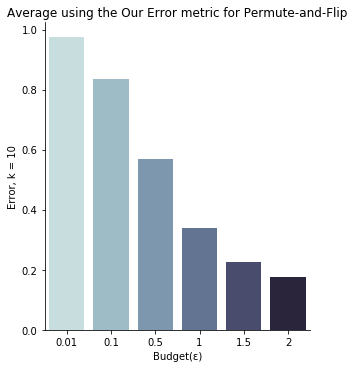

In [30]:
mechanism = 'Permute-and-Flip'
plot_errors(avgs, 10, mechanism)